## 3. Robintrack - some analysis on users/tickers 
    

In [2]:
# Import libraries and dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv

#import numpy as np
#from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

### The objective is to read al the CVS files for all tickers and select (2020 - August) those above a certain number of users 
#### min_users = 0 will select all tickers  



In [7]:
# This function read the csvfile into a datframe and gets the number of users for tickers with number of users bigger than a given target (min_users)

def read_data(raw_csv, min_users):
    
    # Read in csv 
    try:
        df_new_csv = pd.read_csv (raw_csv)  

    except Exception as err:
        print(f'Other error occurred: {err}')  
        return
    else:
        print('.', end = '')

    if df_new_csv.iloc[-1,-1] > min_users:
        print (f'\nticker: {raw_csv[-8:-1]}, number of users = {df_new_csv.iloc[-1,-1]}') 
        return df_new_csv.iloc[-1,-1]


### This main scrip sets the target of users and select all csv in all folders to be analyzed

In [8]:
# Citation: https://pandasninja.com/2019/04/how-to-read-lots-of-csv-files-easily-into-pandas/


# Create and empty DataFrame for most popular tickers 
df_popularity = pd.DataFrame()
min_users = 500000
num_tickers_total = 0

raw_folders = os.listdir('../data/rawdata_robin_all')
for folder in raw_folders:
    raw_csvs = os.listdir(f'../data/rawdata_robin_all/{folder}')
    for raw_csv in raw_csvs:
        raw_csv = f'../data/rawdata_robin_all/{folder}/{raw_csv}'
        number_users = read_data(raw_csv, min_users)
        num_tickers_total += 1
        if number_users:
            df_popularity = df_popularity.append({'ticker' : raw_csv[-8:-1], 'users' : number_users}, ignore_index = True) 

print ('\n\nend of dir loop')
print (f'\n total number of csv files (tickers) = {num_tickers_total}')

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [10]:
df_popularity.describe()

,users
count,8.000000
mean,690669.125000
std,131332.787219
min,563621.000000
25%,591945.000000
50%,645771.500000
75%,762305.250000
max,911470.000000


In [11]:
df_popularity.sort_values('users', axis=0, ascending=True, inplace=False)

,ticker,users
4,TSLA.cs,563621.0
6,/DAL.cs,572679.0
2,/DIS.cs,598367.0
5,/AAL.cs,637705.0
1,MSFT.cs,653838.0
7,AAPL.cs,730774.0
3,t/GE.cs,856899.0
0,rt/F.cs,911470.0


In [15]:
users_low_end = 500000
users_high_end = 700000

df_popularity_select = df_popularity[(df_popularity["users"] > users_low_end) | (df_popularity["users"] < users_high_end)]
df_popularity_select.sort_values('users', axis=0, ascending=True, inplace=False)

,ticker,users
4,TSLA.cs,563621.0
6,/DAL.cs,572679.0
2,/DIS.cs,598367.0
5,/AAL.cs,637705.0
1,MSFT.cs,653838.0
7,AAPL.cs,730774.0
3,t/GE.cs,856899.0
0,rt/F.cs,911470.0


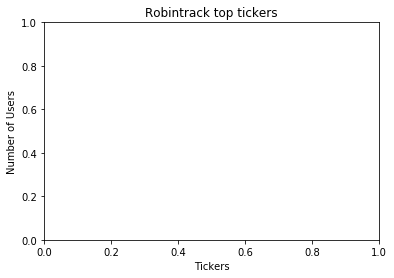

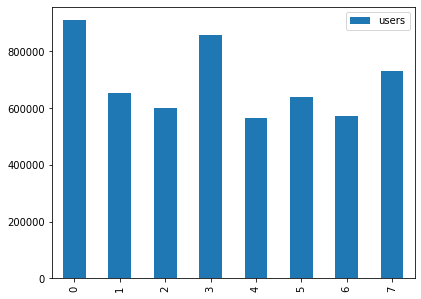

In [16]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

plt.xlabel('Tickers')
plt.ylabel('Number of Users')
plt.title(f'Robintrack top tickers')
#plt.xlim(2010, 2016)
#plt.ylim((housing_units.min()-housing_units.std()), (housing_units.max()+housing_units.std()))
#housing_units.plot.bar(figsize=(6.5, 5)).get_figure().savefig('./Images/housing_units_bar') # --> save plot into a file as well
df_popularity_select[['users', 'ticker']].plot.bar(figsize=(6.5, 5))

In [17]:
# export top ticks  to csv
df_popularity.to_csv(r'../data/cleandata/Processed_Data/df_popularity.csv', index = False)